In [9]:
import generaluse as gu
import resultsmanaging as rm

import pandas as pd
import cv2

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Visualización de imágenes

In [2]:
folder_name = 'batch02'

dictionary = gu.getImgNamesAndPaths(f"preprodata/{folder_name}")

list_filenames = list(dictionary.keys())
list_filepaths = [*dictionary.values()]

list_data = []
for name, path in zip(list_filenames,list_filepaths):
    data = dict()
    data["Filename"] = name
    data["Filepath"] = path
    list_data.append(data)

dataframe = pd.DataFrame(data=list_data)
dataframe

Filename                                   Filepath
0  Experiment-820--01.jpg  preprodata/batch02/Experiment-820--01.jpg
1  Experiment-820--02.jpg  preprodata/batch02/Experiment-820--02.jpg
2  Experiment-820--09.jpg  preprodata/batch02/Experiment-820--09.jpg
3  Experiment-820--12.jpg  preprodata/batch02/Experiment-820--12.jpg

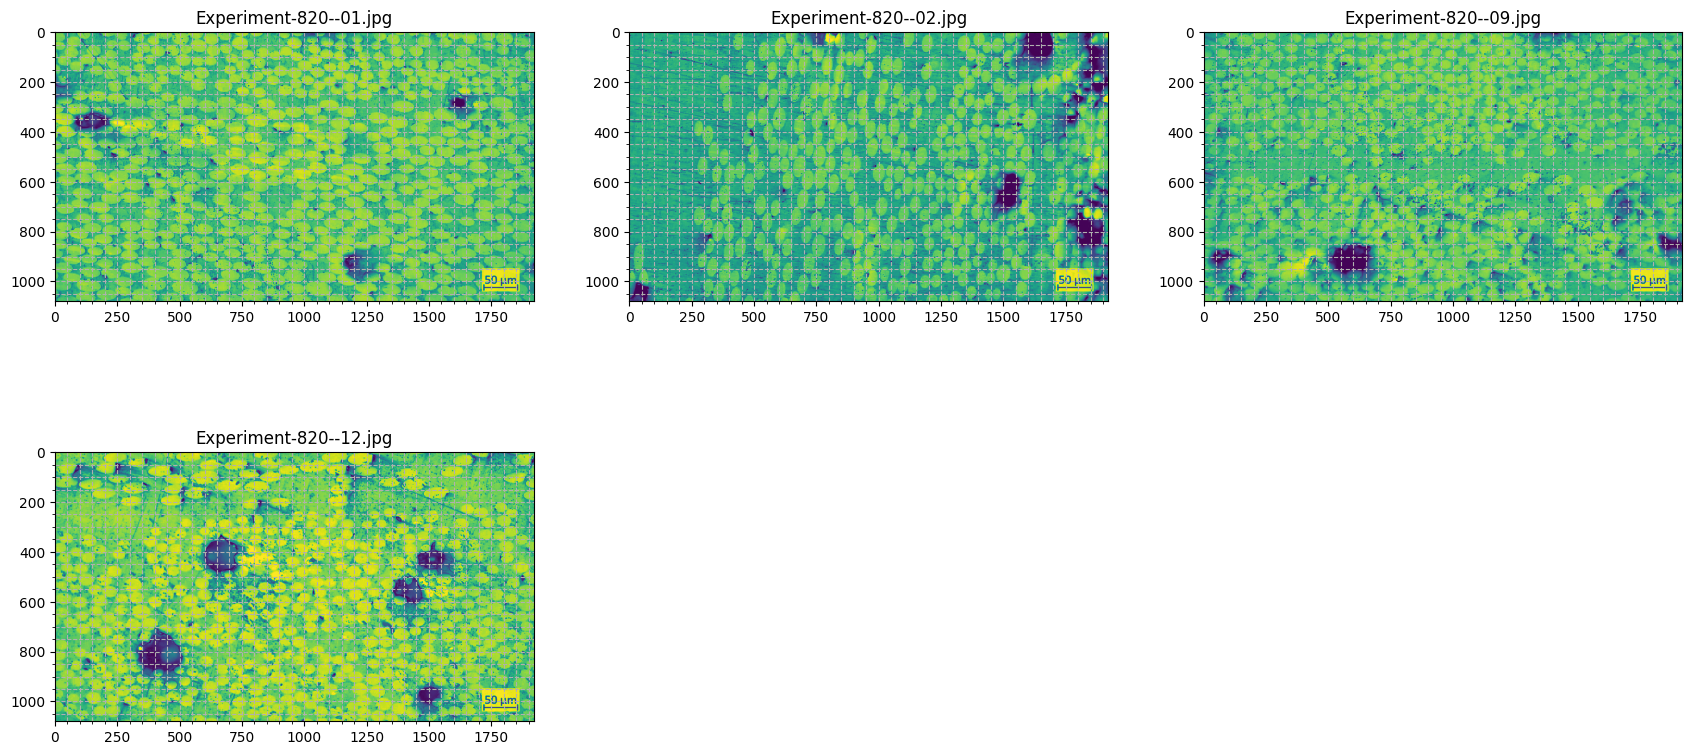

In [3]:
list_imgs = gu.getImagesFromPathfile(list_filepaths,cv2.COLOR_BGR2GRAY)
gu.plotFigures(list_filenames,list_imgs)

In [21]:
# Coordenadas = (i,j) = (y,x)

list_bubbles_coordinates = [
    [(350,150),(900,1200),(280,1600)],
    [(1050,50),(650,1500),(50,1650),(100,1870),(800,1850)],
    [(900,90),(900,550),(850,1850)],
    [(800,400),(450,650),(530,1400),(430,1470),(970,1500)],
]

dataframe["BubbleCoor"] = list_bubbles_coordinates
dataframe

Filename                                   Filepath  \
0  Experiment-820--01.jpg  preprodata/batch02/Experiment-820--01.jpg   
1  Experiment-820--02.jpg  preprodata/batch02/Experiment-820--02.jpg   
2  Experiment-820--09.jpg  preprodata/batch02/Experiment-820--09.jpg   
3  Experiment-820--12.jpg  preprodata/batch02/Experiment-820--12.jpg   

                                          BubbleCoor GLBoundaries  
0             [(350, 150), (900, 1200), (280, 1600)]    [50, 200]  
1  [(1050, 50), (650, 1500), (50, 1650), (100, 18...    [50, 180]  
2               [(900, 90), (900, 550), (850, 1850)]    [50, 190]  
3  [(800, 400), (450, 650), (530, 1400), (430, 14...    [50, 220]

## Visualización de histogramas de cada elemento

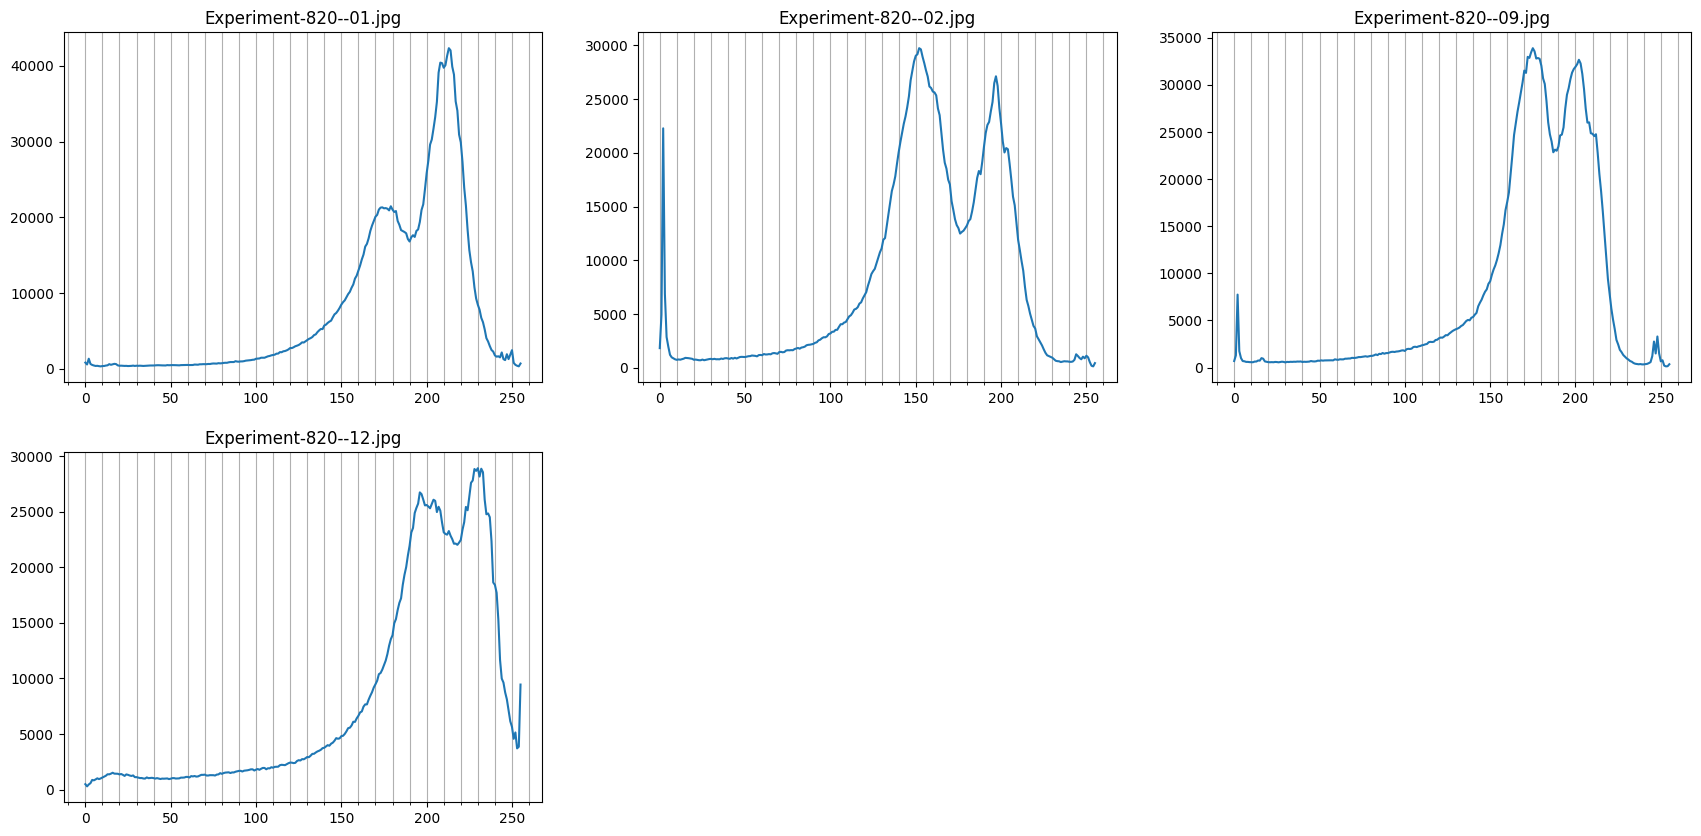

In [6]:
list_hist = []
for img in list_imgs:

    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    list_hist.append(hist)

gu.plotHist(list_filenames,list_hist)


In [24]:
list_graylevel_boundaries = [
    [100,200],
    [100,180],
    [100,190],
    [100,220],
]

dataframe["GLBoundaries"] = list_graylevel_boundaries

dataframe

Filename                                   Filepath  \
0  Experiment-820--01.jpg  preprodata/batch02/Experiment-820--01.jpg   
1  Experiment-820--02.jpg  preprodata/batch02/Experiment-820--02.jpg   
2  Experiment-820--09.jpg  preprodata/batch02/Experiment-820--09.jpg   
3  Experiment-820--12.jpg  preprodata/batch02/Experiment-820--12.jpg   

                                          BubbleCoor GLBoundaries  
0             [(350, 150), (900, 1200), (280, 1600)]   [100, 200]  
1  [(1050, 50), (650, 1500), (50, 1650), (100, 18...   [100, 180]  
2               [(900, 90), (900, 550), (850, 1850)]   [100, 190]  
3  [(800, 400), (450, 650), (530, 1400), (430, 14...   [100, 220]

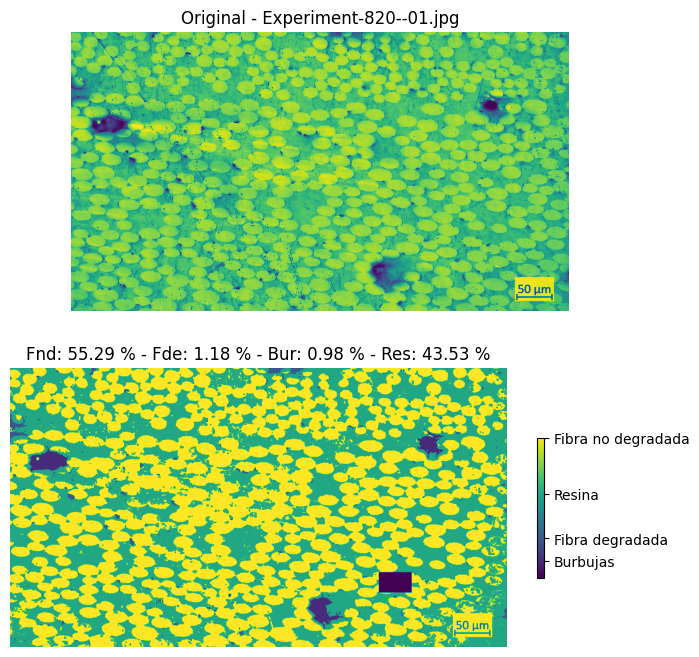

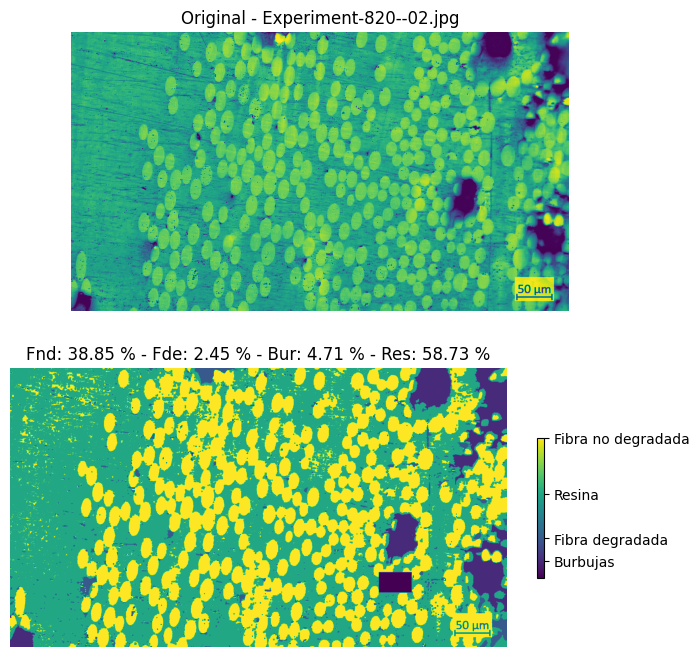

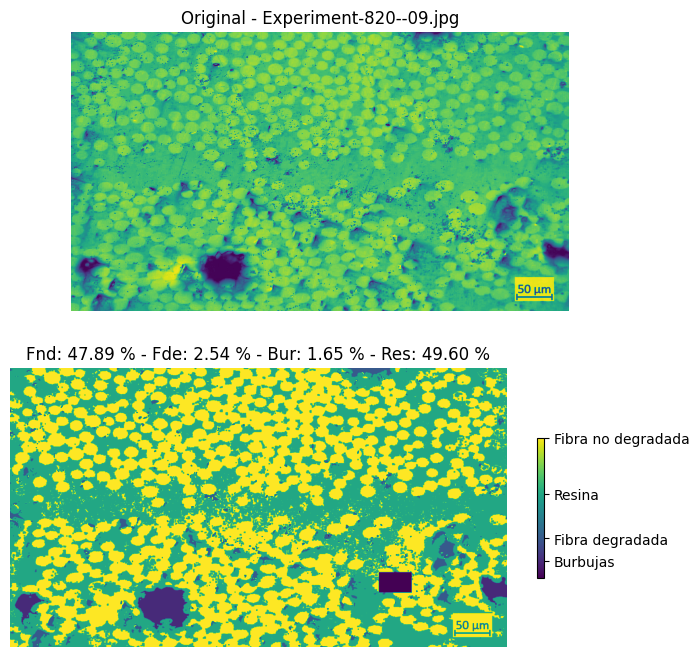

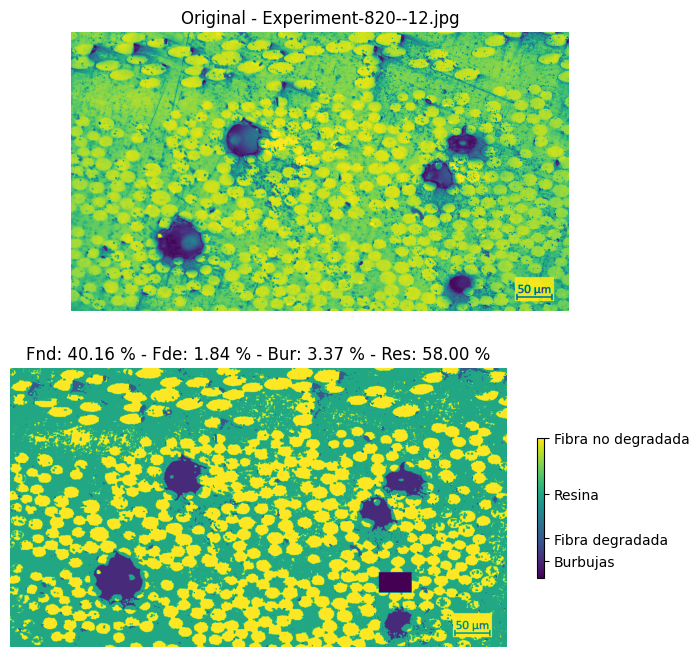

In [25]:
list_results = []
list_results = rm.showResults(list_imgs,list_filenames,list_graylevel_boundaries,list_bubbles_coordinates)

In [26]:
dataframe_results = pd.concat([dataframe, pd.DataFrame(list_results)], axis=1).reindex(dataframe.index)
dataframe_results

Filename                                   Filepath  \
0  Experiment-820--01.jpg  preprodata/batch02/Experiment-820--01.jpg   
1  Experiment-820--02.jpg  preprodata/batch02/Experiment-820--02.jpg   
2  Experiment-820--09.jpg  preprodata/batch02/Experiment-820--09.jpg   
3  Experiment-820--12.jpg  preprodata/batch02/Experiment-820--12.jpg   

                                          BubbleCoor GLBoundaries        Fnd  \
0             [(350, 150), (900, 1200), (280, 1600)]   [100, 200]  55.294158   
1  [(1050, 50), (650, 1500), (50, 1650), (100, 18...   [100, 180]  38.851368   
2               [(900, 90), (900, 550), (850, 1850)]   [100, 190]  47.888292   
3  [(800, 400), (450, 650), (530, 1400), (430, 14...   [100, 220]  40.155275   

        Fde       Bur        Res  
0  1.178881  0.975980  43.534327  
1  2.446056  4.709757  58.728309  
2  2.542830  1.648699  49.596548  
3  1.840260  3.370862  58.004514

In [19]:
dataframe_results_to_excel = dataframe_results.drop(["Filepath","BubbleCoor", "GLBoundaries"], axis=1)
dataframe_results_to_excel

Filename        Fnd        Fde        Bur        Res
0  pp-frb-001.jpg  30.686923  24.441879   1.105944  44.874701
1  pp-frb-002.jpg  30.057977  15.636638   2.610496  54.305385
2  pp-frb-003.jpg  32.331373  17.550936   3.107670  50.117691
3  pp-frb-004.jpg  21.092592  14.922576  14.065324  63.984832
4  pp-frb-005.jpg  35.639468  18.910897   2.367409  45.449635

## Guardado de los resultados obtenidos

In [ ]:
savings_folder = "batch01"
rm.saveResults(list_imgs,list_filenames,list_graylevel_boundaries,list_bubbles_coordinates,savings_folder,dataframe_results_to_excel)